In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [300]:
df = pd.read_csv('data/smart_traffic_management_dataset.csv')
df.head()

,timestamp,location_id,traffic_volume,avg_vehicle_speed,vehicle_count_cars,vehicle_count_trucks,vehicle_count_bikes,weather_condition,temperature,humidity,accident_reported,signal_status
0,2024-01-01 00:00:00,4,504,53.124162,142,24,44,Cloudy,33.334387,36.390698,0,Red
1,2024-01-01 00:01:00,5,209,44.947850,862,50,23,Cloudy,17.926830,37.640927,0,Green
2,2024-01-01 00:02:00,3,572,63.179229,317,12,10,Windy,33.483375,84.262610,1,Red
3,2024-01-01 00:03:00,5,699,42.269697,709,43,21,Sunny,19.212941,61.550978,0,Yellow
4,2024-01-01 00:04:00,5,639,72.185791,594,34,14,Cloudy,11.349244,77.494506,0,Red


In [302]:
print(f'Rows: {df.shape[0]}')
print(f'Cols: {df.shape[1]}')
print(df.info())
print(df.describe())

Rows: 2000
Cols: 12
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             2000 non-null   object 
 1   location_id           2000 non-null   int64  
 2   traffic_volume        2000 non-null   int64  
 3   avg_vehicle_speed     2000 non-null   float64
 4   vehicle_count_cars    2000 non-null   int64  
 5   vehicle_count_trucks  2000 non-null   int64  
 6   vehicle_count_bikes   2000 non-null   int64  
 7   weather_condition     2000 non-null   object 
 8   temperature           2000 non-null   float64
 9   humidity              2000 non-null   float64
 10  accident_reported     2000 non-null   int64  
 11  signal_status         2000 non-null   object 
dtypes: float64(3), int64(6), object(3)
memory usage: 187.6+ KB
None
       location_id  traffic_volume  avg_vehicle_speed  vehicle_count_cars  \
count  2000.0

In [303]:
#check any null values 
df.isna().any()

timestamp               False
location_id             False
traffic_volume          False
avg_vehicle_speed       False
vehicle_count_cars      False
vehicle_count_trucks    False
vehicle_count_bikes     False
weather_condition       False
temperature             False
humidity                False
accident_reported       False
signal_status           False
dtype: bool

In [306]:
#convert string date to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed', errors='coerce')

In [307]:
#Remove possible naT values  
df.dropna(subset=['timestamp'], inplace=True)

In [309]:
#Add new day and hour features (columns)
df['day'] = df['timestamp'].apply(lambda dt: dt.day)
df['hour'] = df['timestamp'].apply(lambda dt: dt.hour)
df.head()

,timestamp,location_id,traffic_volume,avg_vehicle_speed,vehicle_count_cars,vehicle_count_trucks,vehicle_count_bikes,weather_condition,temperature,humidity,accident_reported,signal_status,day,hour
0,2024-01-01 00:00:00,4,504,53.124162,142,24,44,Cloudy,33.334387,36.390698,0,Red,1,0
1,2024-01-01 00:01:00,5,209,44.947850,862,50,23,Cloudy,17.926830,37.640927,0,Green,1,0
2,2024-01-01 00:02:00,3,572,63.179229,317,12,10,Windy,33.483375,84.262610,1,Red,1,0
3,2024-01-01 00:03:00,5,699,42.269697,709,43,21,Sunny,19.212941,61.550978,0,Yellow,1,0
4,2024-01-01 00:04:00,5,639,72.185791,594,34,14,Cloudy,11.349244,77.494506,0,Red,1,0


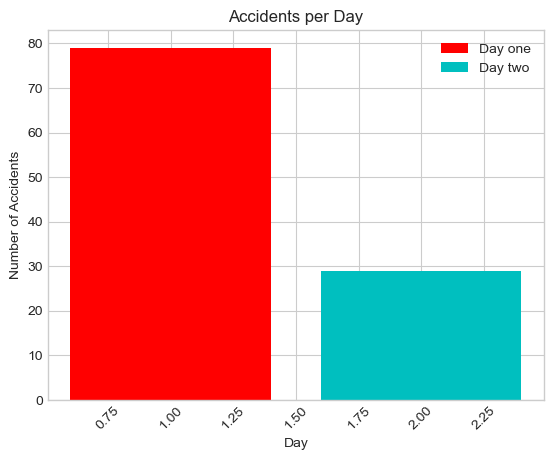

In [311]:
#make a bar charts to display accidents per day using matplotlib bar
accidents_per_day = df.groupby('day')['accident_reported'].sum()

plt.bar(accidents_per_day.index[0], accidents_per_day.values[0], color='r', label='Day one')
plt.bar(accidents_per_day.index[1], accidents_per_day.values[1], color='c', label='Day two')

plt.xlabel('Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents per Day')
plt.xticks(rotation=45)
plt.legend()
plt.show()

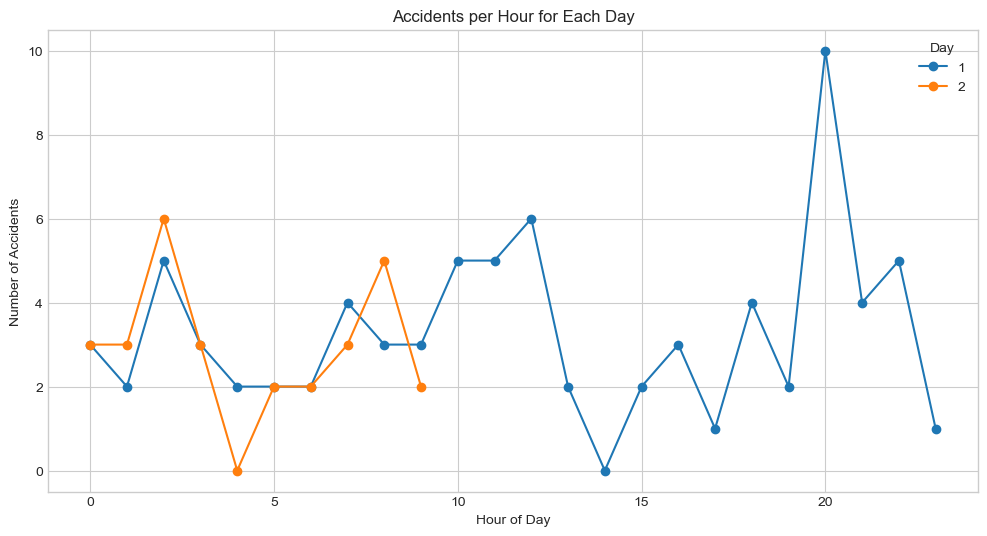

In [313]:
#accidents every hour during the day
accidents_hour_day = df.groupby(['hour', 'day'])['accident_reported'].sum().unstack()

accidents_hour_day.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Accidents per Hour for Each Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Day')
plt.grid(True)
plt.show()

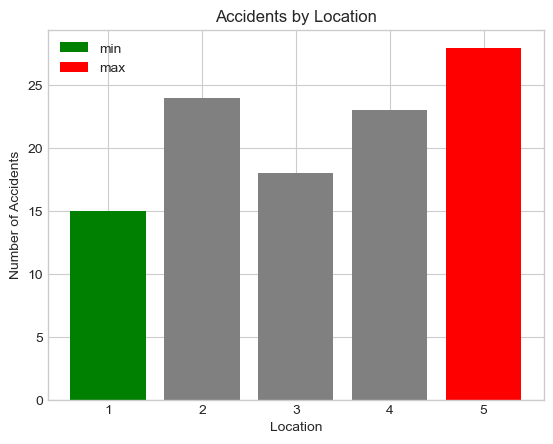

In [314]:
#make a bar charts to display accidents by location
accidents_by_location = df.groupby('location_id')['accident_reported'].sum()

max_val = accidents_by_location.max()
min_val = accidents_by_location.min()

cnt = 0
for val in accidents_by_location:
    if val == max_val:
        plt.bar(accidents_by_location.index[cnt], accidents_by_location.values[cnt], color='red', label="max")
    elif val == min_val:
        plt.bar(accidents_by_location.index[cnt], accidents_by_location.values[cnt], color='green', label="min")
    else:
        plt.bar(accidents_by_location.index[cnt], accidents_by_location.values[cnt], color='gray')
    cnt+=1

plt.xlabel('Location')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Location')
plt.legend()
plt.show()

In [315]:
#Comparison of whether an accident occurred or not based on speed
avg_speed_accident = df[df['accident_reported'] == 1]['avg_vehicle_speed'].mean().round(1)
avg_speed_no_accident = df[df['accident_reported'] == 0]['avg_vehicle_speed'].mean().round(1)
print(avg_speed_accident)
print(avg_speed_no_accident)

50.8
50.0


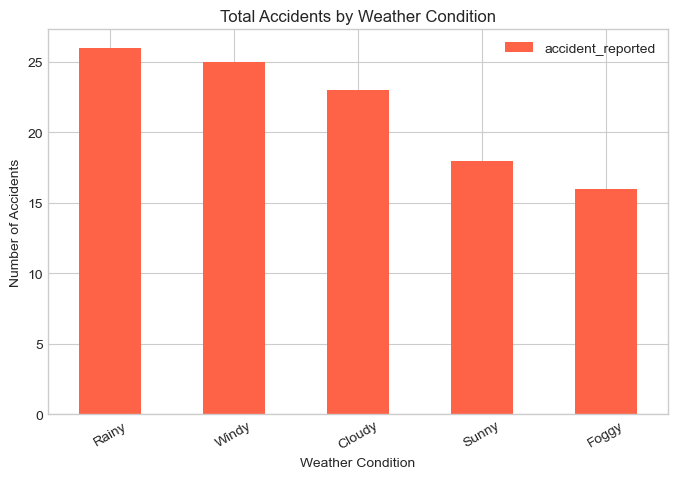

In [317]:
weather_stats = df.pivot_table(
    index='weather_condition', 
    values='accident_reported', 
    aggfunc='sum'
)

weather_stats.sort_values('accident_reported', ascending=False).plot(
    kind='bar', color='tomato', figsize=(8,5)
)

plt.title('Total Accidents by Weather Condition')
plt.ylabel('Number of Accidents')
plt.xlabel('Weather Condition')
plt.xticks(rotation=30)
plt.show()


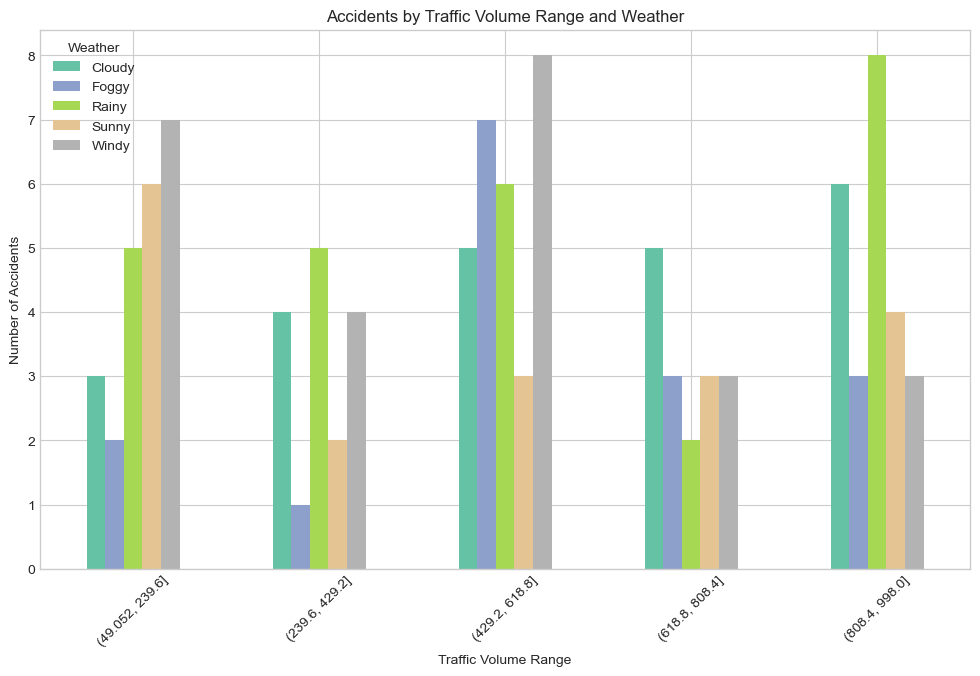

In [338]:
# Accidents by trafic volume range and weather

traffic_bins = pd.cut(df['traffic_volume'], bins=5)

traffic_weather_pivot = df.pivot_table(
    index=traffic_bins,
    columns='weather_condition',
    values='accident_reported',
    aggfunc='sum',
    observed=False
)
traffic_weather_pivot.plot(kind='bar', figsize=(12,7), colormap='Set2')
plt.title('Accidents by Traffic Volume Range and Weather')
plt.ylabel('Number of Accidents')
plt.xlabel('Traffic Volume Range')
plt.xticks(rotation=45)
plt.legend(title='Weather')
plt.show()

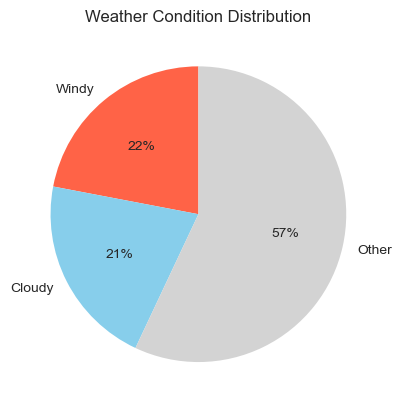

In [381]:
#present weather condition
present_w_c = df['weather_condition'].value_counts(normalize=True).mul(100).round(0).astype(int).sort_values(ascending=False)
first_two = present_w_c[:2]
other_con = 100 - sum(first_two)
values = list(first_two) + [other_con]
labels = list(first_two.index) + ['Other']
plt.pie(values, labels=labels, autopct='%1.0f%%', startangle=90, colors=['tomato', 'skyblue', 'lightgray'])
plt.title('Weather Condition Distribution')
plt.show()

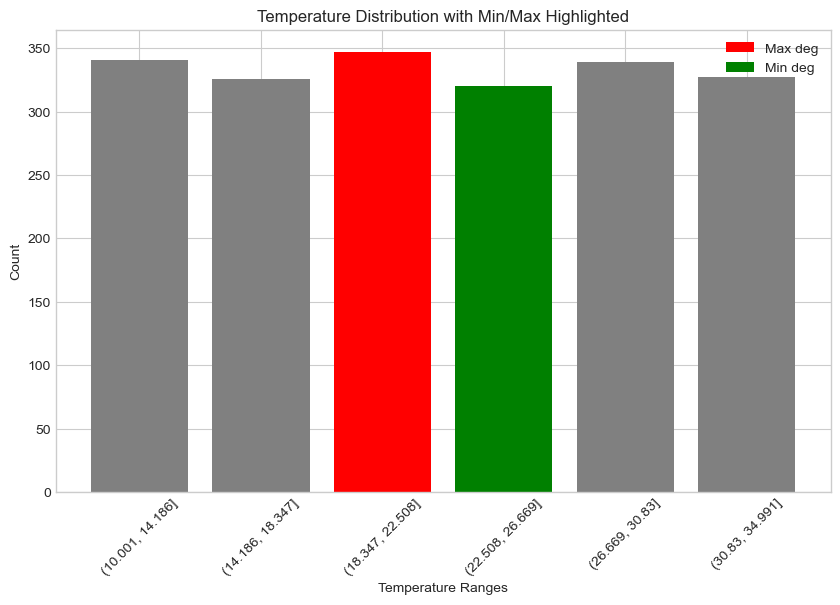

In [458]:
temp_ranges = pd.cut(df['temperature'], bins=6).value_counts().sort_index()

max_temp = temp_ranges.max()
min_temp = temp_ranges.min()

plt.figure(figsize=(10, 6)) 

cnt = 0
for value in temp_ranges:
    if value == max_temp:
        plt.bar(str(temp_ranges.index[cnt]), temp_ranges.values[cnt], color="red", label="Max deg")
    elif value == min_temp:
        plt.bar(str(temp_ranges.index[cnt]), temp_ranges.values[cnt], color="green", label="Min deg")
    else:
        plt.bar(str(temp_ranges.index[cnt]), temp_ranges.values[cnt], color="gray")
    cnt += 1

plt.xlabel('Temperature Ranges')
plt.ylabel('Count')
plt.title('Temperature Distribution with Min/Max Highlighted')
plt.legend()
plt.xticks(rotation=45)
plt.show()